In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np

file_path = '/content/drive/My Drive/DataScience/Data/cleaned_data_weather.csv'
df = pd.read_csv(file_path)

In [3]:
df_original_data = df

In [4]:
df['next_1_day_mean_temp'] = df_original_data['mean_temp'].shift(-1)
df['next_2_day_mean_temp'] = df_original_data['mean_temp'].shift(-2)
df['next_3_day_mean_temp'] = df_original_data['mean_temp'].shift(-3)
df['next_4_day_mean_temp'] = df_original_data['mean_temp'].shift(-4)
df['next_5_day_mean_temp'] = df_original_data['mean_temp'].shift(-5)
df['next_6_day_mean_temp'] = df_original_data['mean_temp'].shift(-6)
df['next_7_day_mean_temp'] = df_original_data['mean_temp'].shift(-7)
df['next_8_day_mean_temp'] = df_original_data['mean_temp'].shift(-8)
df['next_9_day_mean_temp'] = df_original_data['mean_temp'].shift(-9)
df['next_10_day_mean_temp'] = df_original_data['mean_temp'].shift(-10)
df['next_11_day_mean_temp'] = df_original_data['mean_temp'].shift(-11)
df['next_12_day_mean_temp'] = df_original_data['mean_temp'].shift(-12)
df['next_13_day_mean_temp'] = df_original_data['mean_temp'].shift(-13)
df['next_14_day_mean_temp'] = df_original_data['mean_temp'].shift(-14)
df['next_15_day_mean_temp'] = df_original_data['mean_temp'].shift(-15)
df['next_16_day_mean_temp'] = df_original_data['mean_temp'].shift(-16)
df['next_17_day_mean_temp'] = df_original_data['mean_temp'].shift(-17)
df['next_18_day_mean_temp'] = df_original_data['mean_temp'].shift(-18)
df['next_19_day_mean_temp'] = df_original_data['mean_temp'].shift(-19)
df['next_20_day_mean_temp'] = df_original_data['mean_temp'].shift(-20)
df['next_21_day_mean_temp'] = df_original_data['mean_temp'].shift(-21)
df['next_22_day_mean_temp'] = df_original_data['mean_temp'].shift(-22)
df['next_23_day_mean_temp'] = df_original_data['mean_temp'].shift(-23)
df['next_24_day_mean_temp'] = df_original_data['mean_temp'].shift(-24)
df['next_25_day_mean_temp'] = df_original_data['mean_temp'].shift(-25)
df['next_26_day_mean_temp'] = df_original_data['mean_temp'].shift(-26)
df['next_27_day_mean_temp'] = df_original_data['mean_temp'].shift(-27)
df['next_28_day_mean_temp'] = df_original_data['mean_temp'].shift(-28)
df['next_29_day_mean_temp'] = df_original_data['mean_temp'].shift(-29)
df['next_30_day_mean_temp'] = df_original_data['mean_temp'].shift(-30)

In [5]:
df.dropna(inplace=True)

In [6]:
del df['date']

#### cloud_cover processing

In [7]:
df['cloud_cover'].value_counts()

7.0    3107
6.0    2949
5.0    2292
8.0    1896
4.0    1815
3.0    1146
2.0     856
1.0     601
0.0     375
5.8       2
6.8       2
5.4       2
7.4       2
9.0       2
5.6       1
6.2       1
6.6       1
7.2       1
Name: cloud_cover, dtype: int64

In [8]:
condition = (df['cloud_cover'] % 1 != 0) | (df['cloud_cover'] > 8.0)

# 从DataFrame中去除满足条件的行
df = df[~condition]

In [9]:
df['cloud_cover'].value_counts()

7.0    3107
6.0    2949
5.0    2292
8.0    1896
4.0    1815
3.0    1146
2.0     856
1.0     601
0.0     375
Name: cloud_cover, dtype: int64

#### change the sunshine into hours

In [10]:
df['sunshine'] = df['sunshine'] * 60

<ipython-input-10-d19a2b1fcbb1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sunshine'] = df['sunshine'] * 60


#### change snow depth into a category value

In [11]:
df['snow_depth'].value_counts()

0.0     14907
1.0        45
2.0        23
4.0        15
3.0        15
5.0         6
6.0         4
7.0         4
8.0         4
10.0        2
12.0        2
11.0        2
9.0         1
0.4         1
18.0        1
13.0        1
15.0        1
16.0        1
22.0        1
0.8         1
Name: snow_depth, dtype: int64

In [12]:
df.loc[df['snow_depth'] > 0, 'snow_depth'] = 1.0

In [13]:
df['snow_depth'].value_counts()

0.0    14907
1.0      130
Name: snow_depth, dtype: int64

#### change the precipitation into category value¶

In [14]:
df['precipitation'].value_counts()

0.00     7897
0.20     1003
0.40      451
0.10      313
0.60      295
         ... 
53.10       1
18.70       1
25.40       1
20.00       1
0.46        1
Name: precipitation, Length: 261, dtype: int64

In [15]:
bins = [-float('inf'), 0.1, 2.5, 10, 50, float('inf')]
labels = [0, 1, 2, 3, 4]

df['precipitation'] = pd.cut(df['precipitation'], bins=bins, labels=labels, right=False)

<ipython-input-15-c7ee6bde3366>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['precipitation'] = pd.cut(df['precipitation'], bins=bins, labels=labels, right=False)


In [16]:
df['precipitation'].value_counts()

0    7897
1    4241
2    2329
3     566
4       4
Name: precipitation, dtype: int64

In [17]:
df['cloud_cover'] = df['cloud_cover'].astype('category')
df['snow_depth'] = df['snow_depth'].astype('category')

<ipython-input-17-22873bf672c2>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['cloud_cover'] = df['cloud_cover'].astype('category')
<ipython-input-17-22873bf672c2>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['snow_depth'] = df['snow_depth'].astype('category')


In [18]:
df.dtypes

cloud_cover              category
sunshine                  float64
global_radiation          float64
max_temp                  float64
mean_temp                 float64
min_temp                  float64
precipitation            category
pressure                  float64
snow_depth               category
next_1_day_mean_temp      float64
next_2_day_mean_temp      float64
next_3_day_mean_temp      float64
next_4_day_mean_temp      float64
next_5_day_mean_temp      float64
next_6_day_mean_temp      float64
next_7_day_mean_temp      float64
next_8_day_mean_temp      float64
next_9_day_mean_temp      float64
next_10_day_mean_temp     float64
next_11_day_mean_temp     float64
next_12_day_mean_temp     float64
next_13_day_mean_temp     float64
next_14_day_mean_temp     float64
next_15_day_mean_temp     float64
next_16_day_mean_temp     float64
next_17_day_mean_temp     float64
next_18_day_mean_temp     float64
next_19_day_mean_temp     float64
next_20_day_mean_temp     float64
next_21_day_me

In [19]:
import pandas as pd
from sklearn.model_selection import train_test_split
from scipy.stats import pearsonr


X = df.drop(['next_1_day_mean_temp','next_2_day_mean_temp','next_3_day_mean_temp','next_4_day_mean_temp','next_5_day_mean_temp','next_6_day_mean_temp','next_7_day_mean_temp','next_8_day_mean_temp','next_9_day_mean_temp','next_10_day_mean_temp','next_11_day_mean_temp','next_12_day_mean_temp','next_13_day_mean_temp','next_14_day_mean_temp','next_15_day_mean_temp','next_16_day_mean_temp','next_17_day_mean_temp','next_18_day_mean_temp','next_19_day_mean_temp','next_20_day_mean_temp','next_21_day_mean_temp','next_22_day_mean_temp','next_23_day_mean_temp','next_24_day_mean_temp','next_25_day_mean_temp','next_26_day_mean_temp','next_27_day_mean_temp','next_28_day_mean_temp','next_29_day_mean_temp','next_30_day_mean_temp'], axis=1)
y = df[['next_1_day_mean_temp', 'next_2_day_mean_temp', 'next_3_day_mean_temp','next_4_day_mean_temp','next_5_day_mean_temp','next_6_day_mean_temp','next_7_day_mean_temp','next_8_day_mean_temp','next_9_day_mean_temp','next_10_day_mean_temp','next_11_day_mean_temp','next_12_day_mean_temp','next_13_day_mean_temp','next_14_day_mean_temp','next_15_day_mean_temp','next_16_day_mean_temp','next_17_day_mean_temp','next_18_day_mean_temp','next_19_day_mean_temp','next_20_day_mean_temp','next_21_day_mean_temp','next_22_day_mean_temp','next_23_day_mean_temp','next_24_day_mean_temp','next_25_day_mean_temp','next_26_day_mean_temp','next_27_day_mean_temp','next_28_day_mean_temp','next_29_day_mean_temp','next_30_day_mean_temp']]



# 划分训练集为新的训练集和验证集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 划分训练集为新的训练集和验证集
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)




In [20]:
# 打印划分后的数据集大小
print("train dataset:", X_train.shape)
print("validation dataset:", X_val.shape)
print("test dataset:", X_test.shape)

train dataset: (9623, 9)
validation dataset: (2406, 9)
test dataset: (3008, 9)


In [21]:
import xgboost as xgb

dtrain = xgb.DMatrix(X_train, label=y_train, enable_categorical=True)
dvalidation = xgb.DMatrix(X_val, label=y_val, enable_categorical=True)
dtest = xgb.DMatrix(X_test, label=y_test, enable_categorical=True)

In [ ]:
import xgboost as xgb
from sklearn.multioutput import MultiOutputRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, median_absolute_error

def XGBoost_fitness_function(params):

    # Defince the parameters
    learning_rate = params[0]
    n_estimators = int(params[1])
    gamma = params[2]
    max_depth = int(params[3])
    subsample = [0.6, 0.7, 0.8, 0.9, 1][int(params[4])]
    colsample_bytree = [0.6, 0.7, 0.8, 0.9, 1][int(params[5])]
    reg_alpha = params[6]
    reg_lambda = params[7]

    XGBoost = xgb.XGBRegressor(objective='reg:squarederror', learning_rate = learning_rate, n_estimators = n_estimators, gamma = gamma, max_depth = max_depth, subsample = subsample, colsample_bytree = colsample_bytree, reg_alpha = reg_alpha, reg_lambda = reg_lambda, random_state = 42, n_jobs=-1)
    xgboost_model = MultiOutputRegressor(XGBoost)
    xgb_regressor = xgb.train(XGBoost.get_xgb_params(), dtrain)

    y_pred = xgb_regressor.predict(dvalidation)

    mse = mean_squared_error(y_val, y_pred)


    return mse


In [ ]:
!pip install geneticalgorithm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 1.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for func-timeout: filename=func_timeout-4.3.5-py3-none-any.whl size=15078 sha256=0d006fdfcd65842574644a1a78c3a7cafbd089a5dcec3c2288180ef3b8f2b576
  Stored in directory: /root/.cache/pip/wheels/3f/83/19/b5552bb9630e353f7c5b15be44bf10900afe1abbbfcf536afd
Successfully built func-timeout


 The best solution found:
 [3.62109323e-01 5.58000000e+02 9.96511466e+00 5.00000000e+00
 4.00000000e+00 4.00000000e+00 5.86082835e-01 9.30309161e-01]

 Objective function:
 8.706351224065347


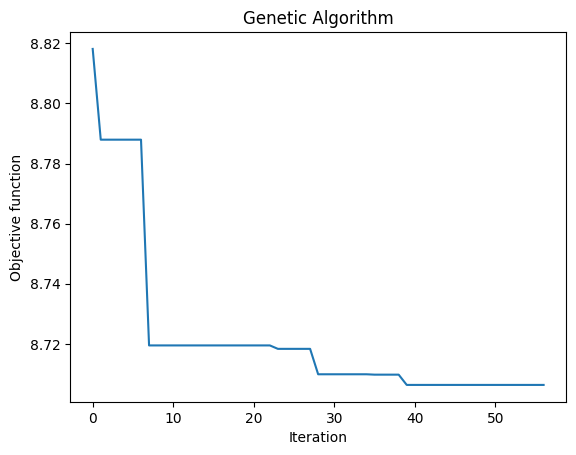

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error
from geneticalgorithm import geneticalgorithm as ga



varbound = np.array([          [0.01, 0.4],            # learning rate
                     [50, 1000],             # n_estimators
                     [0, 10],              # gamma
                     [3, 10],              # max_depth
                     [0, 4],               # subsample
                     [0, 4],               # colsample_bytree
                     [0, 1],               # reg_alpha
                     [0, 1]               # reg_lambda
                     ])


# 创建遗传算法对象
algorithm_param = {'max_num_iteration': 100, 'population_size': 50, 'elit_ratio': 0.01,
                   'parents_portion': 0.3, 'crossover_probability': 0.5, 'mutation_probability': 0.1,
                   'crossover_type': 'uniform', 'max_iteration_without_improv': 15}
model = ga(function=XGBoost_fitness_function, dimension=8, variable_type='real',
           variable_type_mixed  = np.array(['real', 'int', 'real', 'int', 'int', 'int', 'real', 'real']) ,variable_boundaries=varbound,
           algorithm_parameters=algorithm_param, function_timeout = 500)

# 运行遗传算法进行优化
model.run()

# 获得优化的超参数组合
best_params = model.output_dict['variable']

In [22]:
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error
import xgboost as xgb
from sklearn.multioutput import MultiOutputRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, median_absolute_error

# Defince the parameters
learning_rate = 3.62109323e-01
n_estimators = int(5.58000000e+02)
gamma = 9.96511466e+00
max_depth = int(5.00000000e+00)
subsample = [0.6, 0.7, 0.8, 0.9, 1][int(4.00000000e+00)]
colsample_bytree = [0.6, 0.7, 0.8, 0.9, 1][int(4.00000000e+00)]
reg_alpha = 5.86082835e-01
reg_lambda = 9.30309161e-01

XGBoost = xgb.XGBRegressor(objective='reg:squarederror', learning_rate = learning_rate, n_estimators = n_estimators, gamma = gamma, max_depth = max_depth, subsample = subsample, colsample_bytree = colsample_bytree, reg_alpha = reg_alpha, reg_lambda = reg_lambda, random_state = 42, n_jobs=-1)
xgboost_model = MultiOutputRegressor(XGBoost)
xgb_regressor = xgb.train(XGBoost.get_xgb_params(), dtrain)



y_pred = xgb_regressor.predict(dtest)

mse = mean_squared_error(y_test, y_pred)

mae = mean_absolute_error(y_test, y_pred)

rmse = np.sqrt(mse)

mdae = median_absolute_error(y_test, y_pred)

diff = np.abs((y_test - y_pred) / y_test)
diff.replace([np.inf, -np.inf], np.nan, inplace=True)
diff.dropna(inplace=True)
mape = np.mean(np.mean(diff)*100)


n = y_test.shape[1]
rmspe_scores = []
for i in range(n):
    y_obs = y_test.iloc[:, i]
    y_predict = y_pred[:, i]
    diff = ((y_obs - y_predict) / y_obs) ** 2
    diff.replace([np.inf, -np.inf], np.nan, inplace=True)
    diff.dropna(inplace=True)
    rmspe = np.sqrt(np.mean(diff)) * 100
    rmspe_scores.append(rmspe)
rmspe = np.mean(rmspe_scores)

correlations = []
for i in range(y_test.shape[1]):
    pearson_corr, _ = pearsonr(y_test.iloc[:, i], y_pred[:,i])
    correlations.append(pearson_corr)
mean_pearson_corr = np.mean(correlations)


n = y_test.shape[1]
ia_scores = []
for i in range(n):
    y_obs = y_test.iloc[:, i]
    y_predict = y_pred[:,i]
    y_obs_avg = np.mean(y_obs)

    numerator = np.sum((y_predict - y_obs)**2)
    denominator = np.sum((y_obs_avg - y_obs)**2)
    ia = 1 - (numerator / denominator)
    ia_scores.append(ia)
d = np.mean(ia_scores)

print(f'MSE: {mse:.4f}')
print(f'RMSE: {mae:.4f}')
print(f'MAE: {rmse:.4f}')
print(f'MdAE: {mdae:.4f}')
print(f'MAPE: {mape:.4f}')
print(f'RMSPE: {rmspe:.4f}')
print(f'Pearson Coefficient: {mean_pearson_corr:.4f}')
print(f'Index of Agreement (IoA): {d:.4f}')




MSE: 8.7411
RMSE: 2.3463
MAE: 2.9565
MdAE: 1.9998
MAPE: 52.7059
RMSPE: 243.4484
Pearson Coefficient: 0.8583
Index of Agreement (IoA): 0.7367


/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
